Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7736 - loss: 0.6526
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8592 - loss: 0.3865
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8718 - loss: 0.3470
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8806 - loss: 0.3247
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8878 - loss: 0.3013
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8951 - loss: 0.2815
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8974 - loss: 0.2768
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9021 - loss: 0.2625
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9055 - loss: 0.2513
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9087 - loss: 0.2446
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9075 - loss: 0.2386
Epoch 12/20
1875/1875 ━━━━━━

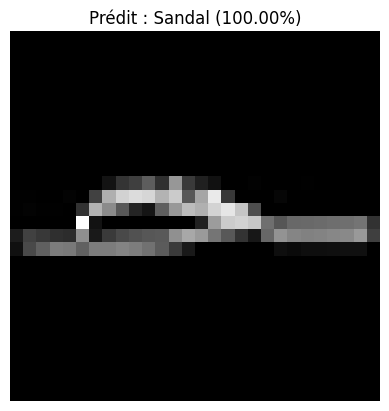

In [ ]:
# 1. Importer les bibliothèques
import numpy as np # Pour le traitement numérique (vecteurs, matrices)
import matplotlib.pyplot as plt   # Pour afficher les images et visualiser les résultats
import tensorflow as tf    # Bibliothèque principale pour l'apprentissage automatique
from tensorflow import keras   # API de haut niveau pour créer et entraîner les modèles
from tensorflow.keras.models import Sequential   # Pour définir un modèle linéaire empilé (Sequential)
from tensorflow.keras.layers import Dense     # Pour ajouter des couches de neurones (dense/fully connected)
from tensorflow.keras.datasets import fashion_mnist  # Pour transformer les labels en format one-hot (binaire
from tensorflow.keras.utils import to_categorical   # Importer le dataset Fashion MNIST (images de vêtements)

# 2. Charger et préparer les données Fashion MNIST
(X_train_data, Y_train_data), (X_test_data, Y_test_data) = fashion_mnist.load_data()
# X_train_data : images d'entraînement (60 000 échantillons, 28x28 pixels)
# Y_train_data : labels d'entraînement (entiers de 0 à 9)
# X_test_data, Y_test_data : idem pour les données de test (10 000 échantillons

#3.Prétraitement des données et encodage des étiquettes
# Normalisation et mise en forme
X_train = X_train_data.reshape((X_train_data.shape[0], 784)) / 255.0
X_test = X_test_data.reshape((X_test_data.shape[0], 784)) / 255.0
# On aplatit chaque image (28x28 → 784 pixels) et on normalise les valeurs entre 0 et 1
# Encodage one-hot
Y_train = to_categorical(Y_train_data, num_classes=10)
Y_test = to_categorical(Y_test_data, num_classes=10)
# On encode les étiquettes en vecteurs one-hot : ex. 3 devient [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

# 4. Créer le modèle
model = Sequential() # Initialisation du modèlej-
model.add(Dense(64, input_dim=784, activation='relu')) # 1ère couche cachée avec 64 neurones, fonction d’activation ReLU
model.add(Dense(64, activation='relu')) # 2e couche cachée, 64 neurones aussi, ReLU
model.add(Dense(10, activation='softmax')) # Couche de sortie avec 10 neurones (1 par classe), activation softmaxS

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fonction de perte : categorical_crossentropy pour la classification multi-classes
# Optimiseur : Adam (adaptatif et efficace)
# Métrique utilisée : accuracy (précision)


# Résumé du modèle
model.summary()

# 6. Entraînement
model.fit(X_train, Y_train, epochs=20, batch_size=32)
# Le modèle apprend pendant 20 époques, en traitant les données par lot (batch) de 32 images à la fois

# 7. Évaluation
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Erreur (loss) :", loss)
print("Précision (accuracy) :", accuracy)
# Affiche la performance du modèle après l'entraînement sur les données de test (non vues pendant l’apprentissage)
# 8. Prédiction sur une image
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i =8 # changer l'indice pour voir une autre image
predictions = model.predict(X_test)# Le modèle prédit les probabilités pour chaque image de test
predicted_label = np.argmax(predictions[i])# On prend la classe avec la plus forte probabilité
true_label = Y_test_data[i]
confidence = predictions[i][predicted_label] * 100

print("Prédiction :", class_names[predicted_label])
print("Vérité :", class_names[true_label])
print(f"Confiance : {confidence:.2f}%")

# Affichage de l'image
plt.imshow(X_test_data[i], cmap='gray')
plt.title(f"Prédit : {class_names[predicted_label]} ({confidence:.2f}%)")
plt.axis('off')
plt.show()
